In [1]:
import pyconll
import nltk
from nltk.tag import DefaultTagger, UnigramTagger, BigramTagger, TrigramTagger

import pandas as pd
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np

C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense

## task 1

In [3]:
full_train = pyconll.load_from_file('D:/GeekBrains/nlp/les05/data/ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('D:/GeekBrains/nlp/les05/data/ru_syntagrus-ud-dev.conllu')

In [4]:
fdata_train = []
for sent in full_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])
    
fdata_test = []
for sent in full_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])
    
fdata_sent_test = [] #только слова, без меток
for sent in full_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [5]:
fdata_labels_test = [] 
for sent in full_test[:]:
    fdata_labels_test.append([token.upos for token in sent])

In [6]:
# fdata_train

In [7]:
# fdata_train_all = [word for sent in fdata_train for word in sent]
# fdata_test_all = [word for sent in fdata_test for word in sent]
# fdata_sent_test_all = [word for sent in fdata_sent_test for word in sent]

In [8]:
from collections import Counter
lbls = [lbl for sent in fdata_labels_test for lbl in sent]
Counter(lbls).keys(), Counter(lbls).values()

(dict_keys(['NOUN', 'PUNCT', 'ADP', 'PART', 'PROPN', 'ADJ', 'VERB', 'CCONJ', 'ADV', 'PRON', 'SCONJ', 'DET', 'AUX', 'NUM', 'X', None, 'SYM', 'INTJ']),
 dict_values([27974, 22694, 10585, 3875, 4438, 11222, 13078, 4410, 6165, 5598, 2258, 3085, 1108, 1829, 105, 204, 53, 11]))

In [9]:
class_names = ['NOUN', 'PUNCT', 'ADP', 'PART', 'PROPN', 'ADJ', 'VERB', 'CCONJ', 'ADV', 'PRON', 'SCONJ', 'DET', 'AUX', 'NUM', 'X', None, 'SYM', 'INTJ']

In [10]:
res = {}

### nltk taggers

In [11]:
unigram_tagger = UnigramTagger(fdata_train)
res['unigram'] = unigram_tagger.evaluate(fdata_test)
display(unigram_tagger.tag(fdata_sent_test[10]), unigram_tagger.evaluate(fdata_test))

[('"', 'PUNCT'),
 ('Алгоритм', None),
 ('-', 'PUNCT'),
 ('это', 'PRON'),
 ('всякая', 'DET'),
 ('система', 'NOUN'),
 ('вычислений', 'NOUN'),
 (',', 'PUNCT'),
 ('выполняемых', 'VERB'),
 ('по', 'ADP'),
 ('строго', 'ADV'),
 ('определённым', None),
 ('правилам', 'NOUN'),
 (',', 'PUNCT'),
 ('которая', 'PRON'),
 ('после', 'ADP'),
 ('какого-либо', 'DET'),
 ('числа', 'NOUN'),
 ('шагов', 'NOUN'),
 ('заведомо', 'ADV'),
 ('приводит', 'VERB'),
 ('к', 'ADP'),
 ('решению', 'NOUN'),
 ('поставленной', 'VERB'),
 ('задачи', 'NOUN'),
 ('"', 'PUNCT'),
 ('.', 'PUNCT'),
 ('(', 'PUNCT'),
 ('А.', 'PROPN'),
 ('Колмогоров', 'PROPN'),
 (')', 'PUNCT'),
 ('.', 'PUNCT')]

0.8772537323492737

In [12]:
bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)
res['bigram'] =  bigram_tagger.evaluate(fdata_test)
display(bigram_tagger.tag(fdata_sent_test[10]), bigram_tagger.evaluate(fdata_test))

[('"', 'PUNCT'),
 ('Алгоритм', None),
 ('-', 'PUNCT'),
 ('это', 'PRON'),
 ('всякая', 'DET'),
 ('система', 'NOUN'),
 ('вычислений', 'NOUN'),
 (',', 'PUNCT'),
 ('выполняемых', 'VERB'),
 ('по', 'ADP'),
 ('строго', 'ADV'),
 ('определённым', None),
 ('правилам', 'NOUN'),
 (',', 'PUNCT'),
 ('которая', 'PRON'),
 ('после', 'ADP'),
 ('какого-либо', 'DET'),
 ('числа', 'NOUN'),
 ('шагов', 'NOUN'),
 ('заведомо', 'ADV'),
 ('приводит', 'VERB'),
 ('к', 'ADP'),
 ('решению', 'NOUN'),
 ('поставленной', 'VERB'),
 ('задачи', 'NOUN'),
 ('"', 'PUNCT'),
 ('.', 'PUNCT'),
 ('(', 'PUNCT'),
 ('А.', 'PROPN'),
 ('Колмогоров', 'PROPN'),
 (')', 'PUNCT'),
 ('.', 'PUNCT')]

0.8829828463586425

In [13]:
trigram_tagger = TrigramTagger(fdata_train, backoff=bigram_tagger)
res['trigram'] =  trigram_tagger.evaluate(fdata_test)
display(trigram_tagger.tag(fdata_sent_test[10]), trigram_tagger.evaluate(fdata_test))

[('"', 'PUNCT'),
 ('Алгоритм', None),
 ('-', 'PUNCT'),
 ('это', 'PRON'),
 ('всякая', 'DET'),
 ('система', 'NOUN'),
 ('вычислений', 'NOUN'),
 (',', 'PUNCT'),
 ('выполняемых', 'VERB'),
 ('по', 'ADP'),
 ('строго', 'ADV'),
 ('определённым', None),
 ('правилам', 'NOUN'),
 (',', 'PUNCT'),
 ('которая', 'PRON'),
 ('после', 'ADP'),
 ('какого-либо', 'DET'),
 ('числа', 'NOUN'),
 ('шагов', 'NOUN'),
 ('заведомо', 'ADV'),
 ('приводит', 'VERB'),
 ('к', 'ADP'),
 ('решению', 'NOUN'),
 ('поставленной', 'VERB'),
 ('задачи', 'NOUN'),
 ('"', 'PUNCT'),
 ('.', 'PUNCT'),
 ('(', 'PUNCT'),
 ('А.', 'PROPN'),
 ('Колмогоров', 'PROPN'),
 (')', 'PUNCT'),
 ('.', 'PUNCT')]

0.882081353418933

In [14]:
trigram_tagger.evaluate(fdata_test)

0.882081353418933

In [15]:
def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NOUN') # самый популярный в test
tag = backoff_tagger(fdata_train,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff) 

res['combo'] =  tag.evaluate(fdata_test) 
tag.evaluate(fdata_test) 

0.9119991237825633

### models

In [16]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])
        
test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        test_tok.append(tok[0])
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [17]:
fdata_train[1]

[('Начальник', 'NOUN'),
 ('областного', 'ADJ'),
 ('управления', 'NOUN'),
 ('связи', 'NOUN'),
 ('Семен', 'PROPN'),
 ('Еремеевич', 'PROPN'),
 ('был', 'AUX'),
 ('человек', 'NOUN'),
 ('простой', 'ADJ'),
 (',', 'PUNCT'),
 ('приходил', 'VERB'),
 ('на', 'ADP'),
 ('работу', 'NOUN'),
 ('всегда', 'ADV'),
 ('вовремя', 'ADV'),
 (',', 'PUNCT'),
 ('здоровался', 'VERB'),
 ('с', 'ADP'),
 ('секретаршей', 'NOUN'),
 ('за', 'ADP'),
 ('руку', 'NOUN'),
 ('и', 'CCONJ'),
 ('иногда', 'ADV'),
 ('даже', 'PART'),
 ('писал', 'VERB'),
 ('в', 'ADP'),
 ('стенгазету', 'NOUN'),
 ('заметки', 'NOUN'),
 ('под', 'ADP'),
 ('псевдонимом', 'NOUN'),
 ('"', 'PUNCT'),
 ('Муха', 'NOUN'),
 ('"', 'PUNCT'),
 ('.', 'PUNCT')]

In [18]:
train_tok[1]

'.'

In [19]:
le = preprocessing.LabelEncoder()
train_enc_labels = le.fit_transform(train_label)
test_enc_labels = le.transform(test_label)

In [20]:
from nltk.corpus import stopwords
stopword_ru = stopwords.words('russian')
with open('stopwords.txt', encoding='utf8') as f:
    additional_stopwords = set([w.strip() for w in f.readlines() if w]) # from https://github.com/stopwords-iso and others
stopword_ru += list(additional_stopwords)

#### tfidf vectorizer

In [21]:
tfvect = TfidfVectorizer(ngram_range=(1, 4), analyzer='char', binary=False, max_features = 1000, stop_words = stopword_ru)

In [22]:
X_train = tfvect.fit_transform(train_tok)
X_test = tfvect.transform(test_tok)

In [23]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
res['tfvect'] =  accuracy_score(test_enc_labels, pred)
accuracy_score(test_enc_labels, pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8953257169817679

#### hashing vectorizer

In [24]:
hvect = HashingVectorizer(ngram_range=(1, 4), analyzer='char', binary=False, n_features = 1000, stop_words = stopword_ru)

In [25]:
X_train = hvect.fit_transform(train_tok)
X_test = hvect.transform(test_tok)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:502: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [26]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
res['hvect'] =  accuracy_score(test_enc_labels, pred)
accuracy_score(test_enc_labels, pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8866562194587673

#### count vectorizer

In [27]:
cvect = CountVectorizer(ngram_range=(1, 4), analyzer='char', binary=False, max_features = 1000, stop_words = stopword_ru)

In [28]:
X_train = cvect.fit_transform(train_tok)
X_test = cvect.transform(test_tok)

In [29]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
res['cvect'] =  accuracy_score(test_enc_labels, pred)
accuracy_score(test_enc_labels, pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9010042799851717

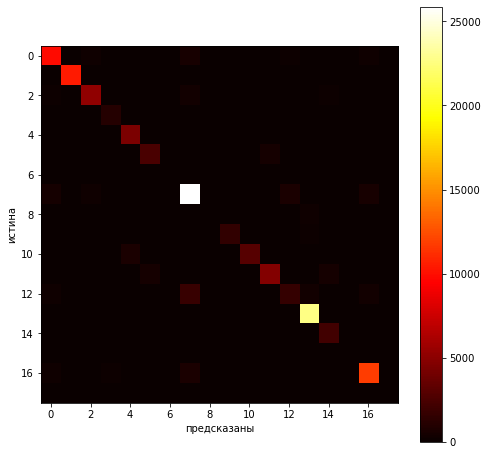

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(test_enc_labels, pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=CM)

plt.figure(figsize=(8, 8))
plt.imshow(CM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xlabel('предсказаны')
plt.ylabel('истина')
plt.show()


In [31]:
le.inverse_transform(list(np.arange(18)))

array(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN',
       'NO_TAG', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM',
       'VERB', 'X'], dtype='<U6')

Точнее всего предсказываются 7 и 13 классы - 'NOUN' и 'PUNCT', хуже всего 6, 8, 15, 17 - 'INTJ', 'NO_TAG', 'SYM', 'X'

In [32]:
CM

array([[ 9894,     5,   284,     1,     1,    22,     0,   577,     0,
           14,     3,     9,   121,    11,     2,     0,   278,     0],
       [    0, 10481,    11,     0,     0,     0,     0,    89,     0,
            0,     0,     1,     1,     0,     0,     0,     2,     0],
       [  197,    45,  5250,     0,     6,    25,     0,   311,     0,
           22,     6,    23,    24,     0,   175,     0,    81,     0],
       [    0,     3,     0,  1074,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    31,     0],
       [    0,     0,     3,     0,  4403,     0,     0,     0,     0,
            0,     4,     0,     0,     0,     0,     0,     0,     0],
       [    4,     6,     4,     0,     0,  2440,     0,    15,     0,
           70,     5,   499,     4,     0,    38,     0,     0,     0],
       [    0,     1,     0,     0,     0,     1,     0,     9,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],

In [33]:
cvect_w = CountVectorizer(ngram_range=(1, 4), analyzer='word', binary=False, max_features = 1000, stop_words = stopword_ru)

In [34]:
X_train = cvect_w.fit_transform(train_tok)
X_test = cvect_w.transform(test_tok)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['_ссылка', 'интерфакс', 'как_сообщили_риа_', 'новости', 'передает_риа_', 'сообщает_', 'сообщает_риа_', 'хотел'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [35]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, train_enc_labels)
pred = lr.predict(X_test)
res['cvect_word'] =  accuracy_score(test_enc_labels, pred)
accuracy_score(test_enc_labels, pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2820156371111785

In [36]:
pd.DataFrame.from_dict(res, orient='index', columns = ['accuracy']).sort_values(by = 'accuracy', ascending = False)

,accuracy
combo,0.911999
cvect,0.901004
tfvect,0.895326
hvect,0.886656
bigram,0.882983
trigram,0.882081
unigram,0.877254
cvect_word,0.282016


Count vectorizer работает почти так же хорошо, как и комбинация тэггеров

## task 2

In [37]:
import corus
from corus import load_ne5

dir = 'D:/GeekBrains/nlp/les05/data/Collection5_n/'
records = load_ne5(dir)
next(records)

Ne5Markup(
    id='001',
    text='юя\x04 \x04>\x04A\x04A\x048\x04O\x00 \x04@\x040\x04A\x04A\x04G\x048\x04B\x04K\x042\x040\x045\x04B\x00 \x04=\x040\x00 \x04:\x04>\x04=\x04A\x04B\x04@\x04C\x04:\x04B\x048\x042\x04=\x04>\x045\x00 \x042\x04>\x047\x044\x045\x049\x04A\x04B\x042\x048\x045\x00 \x04!\x04(\x04\x10\x00 \x04=\x040\x00 \x04\x13\x04@\x04C\x047\x048\x04N\x00\r\x00\n\x00\r\x00\n\x000\x004\x00/\x000\x008\x00/\x002\x000\x000\x008\x00 \x001\x002\x00:\x000\x008\x00\r\x00\n\x00\r\x00\n\x04\x1c\x04\x1e\x04!\x04\x1a\x04\x12\x04\x10\x00,\x00 \x004\x00 \x040\x042\x043\x00 \x00-\x00 \x04 \x04\x18\x04\x10\x00 \x04\x1d\x04>\x042\x04>\x04A\x04B\x048\x00.\x00 \x04 \x04>\x04A\x04A\x048\x04O\x00 \x04@\x040\x04A\x04A\x04G\x048\x04B\x04K\x042\x040\x045\x04B\x00,\x00 \x04G\x04B\x04>\x00 \x04!\x04(\x04\x10\x00 \x042\x04>\x047\x044\x045\x049\x04A\x04B\x042\x04C\x04N\x04B\x00 \x04=\x040\x00 \x04"\x041\x048\x04;\x048\x04A\x048\x00 \x042\x00 \x04A\x042\x04O\x047\x048\x00 \x04A\x00 \x04>\x041\x04>\x04A\x04B\x

In [38]:
# https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus
data = pd.read_csv('D:/GeekBrains/nlp/les05/data/ner_dataset.csv', encoding= 'unicode_escape')
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [39]:
data['Sentence #']=data['Sentence #'].ffill(axis = 0) 
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [40]:
import re
def clean_text(text):
    '''
    очистка текста
    
    на выходе очищенный текст
    
    '''
    if not isinstance(text, str):
        text = str(text)

    text = re.sub("-\s\r\n\|-\s\r\n|\r\n", '', str(text))

    text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•`'·&()]|[+=]|[[]|[]]|[/]|", '', text)
    text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", '', text)
    text = re.sub(r'[\xad]|[\s+]', '', text.strip())

    return text

In [41]:
data['Word'] = data['Word'].apply(lambda x: clean_text(x))

C:\Users\snetkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Possible nested set at position 41
  


In [42]:
data = data[data['Word'] != '']

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948403 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Sentence #  948403 non-null  object
 1   Word        948403 non-null  object
 2   POS         948403 non-null  object
 3   Tag         948403 non-null  object
dtypes: object(4)
memory usage: 36.2+ MB


In [44]:
agg_func = lambda s: [(w,p, t) for w,p, t in zip(s["Word"].values.tolist(),
                                                       s['POS'].values.tolist(),
                                                        s["Tag"].values.tolist())]

In [45]:
agg_data=data.groupby(['Sentence #']).apply(agg_func).reset_index().rename(columns={0:'Sentence_POS_Tag_Pair'})
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat..."
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s..."
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat..."
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O..."
4,Sentence: 10000,"[(UN, NNP, B-geo), (relief, NN, O), (coordinat..."


In [46]:
agg_data['Sentence']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[0] for s in sentence]))
agg_data['POS']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[1] for s in sentence]))
agg_data['Tag']=agg_data['Sentence_POS_Tag_Pair'].apply(lambda sentence:" ".join([s[2] for s in sentence]))
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s...",Iranian officials say they expect to get acces...,JJ NNS VBP PRP VBP TO VB NN TO JJ JJ NNS IN DT...,B-gpe O O O O O O O O O O O O O O B-tim O O B-...
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat...",Helicopter gunships Saturday pounded militant ...,NN NNS NNP VBD JJ NNS IN DT NNP JJ NN WRB JJ N...,O O B-tim O O O O O B-geo O O O O B-org O O O ...
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O...",They left after a tense hourlong standoff with...,PRP VBD IN DT NN JJ NN IN NN NNS,O O O O O O O O O O
4,Sentence: 10000,"[(UN, NNP, B-geo), (relief, NN, O), (coordinat...",UN relief coordinator Jan Egeland said Sunday ...,NNP NN NN NNP NNP VBD NNP NNP JJ CC JJ JJ NNS ...,B-geo O O B-per I-per O B-tim B-geo B-gpe O B-...


In [47]:
agg_data['tokenised_sentences']=agg_data['Sentence'].apply(lambda x:x.split())
agg_data['tag_list']=agg_data['Tag'].apply(lambda x:x.split())
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag,tokenised_sentences,tag_list
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s...",Iranian officials say they expect to get acces...,JJ NNS VBP PRP VBP TO VB NN TO JJ JJ NNS IN DT...,B-gpe O O O O O O O O O O O O O O B-tim O O B-...,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,..."
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat...",Helicopter gunships Saturday pounded militant ...,NN NNS NNP VBD JJ NNS IN DT NNP JJ NN WRB JJ N...,O O B-tim O O O O O B-geo O O O O B-org O O O ...,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O..."
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O...",They left after a tense hourlong standoff with...,PRP VBD IN DT NN JJ NN IN NN NNS,O O O O O O O O O O,"[They, left, after, a, tense, hourlong, stando...","[O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 10000,"[(UN, NNP, B-geo), (relief, NN, O), (coordinat...",UN relief coordinator Jan Egeland said Sunday ...,NNP NN NN NNP NNP VBD NNP NNP JJ CC JJ JJ NNS ...,B-geo O O B-per I-per O B-tim B-geo B-gpe O B-...,"[UN, relief, coordinator, Jan, Egeland, said, ...","[B-geo, O, O, B-per, I-per, O, B-tim, B-geo, B..."


#### nltk pos_tag

In [48]:
agg_data['NLTK_labels'] = agg_data['Sentence'].apply(lambda x: nltk.pos_tag(nltk.word_tokenize(x)))
agg_data.head()

,Sentence #,Sentence_POS_Tag_Pair,Sentence,POS,Tag,tokenised_sentences,tag_list,NLTK_labels
0,Sentence: 1,"[(Thousands, NNS, O), (of, IN, O), (demonstrat...",Thousands of demonstrators have marched throug...,NNS IN NNS VBP VBN IN NNP TO VB DT NN IN NNP C...,O O O O O O B-geo O O O O O B-geo O O O O O B-...,"[Thousands, of, demonstrators, have, marched, ...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo...","[(Thousands, NNS), (of, IN), (demonstrators, N..."
1,Sentence: 10,"[(Iranian, JJ, B-gpe), (officials, NNS, O), (s...",Iranian officials say they expect to get acces...,JJ NNS VBP PRP VBP TO VB NN TO JJ JJ NNS IN DT...,B-gpe O O O O O O O O O O O O O O B-tim O O B-...,"[Iranian, officials, say, they, expect, to, ge...","[B-gpe, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[(Iranian, JJ), (officials, NNS), (say, VBP), ..."
2,Sentence: 100,"[(Helicopter, NN, O), (gunships, NNS, O), (Sat...",Helicopter gunships Saturday pounded militant ...,NN NNS NNP VBD JJ NNS IN DT NNP JJ NN WRB JJ N...,O O B-tim O O O O O B-geo O O O O B-org O O O ...,"[Helicopter, gunships, Saturday, pounded, mili...","[O, O, B-tim, O, O, O, O, O, B-geo, O, O, O, O...","[(Helicopter, NNP), (gunships, NNS), (Saturday..."
3,Sentence: 1000,"[(They, PRP, O), (left, VBD, O), (after, IN, O...",They left after a tense hourlong standoff with...,PRP VBD IN DT NN JJ NN IN NN NNS,O O O O O O O O O O,"[They, left, after, a, tense, hourlong, stando...","[O, O, O, O, O, O, O, O, O, O]","[(They, PRP), (left, VBD), (after, IN), (a, DT..."
4,Sentence: 10000,"[(UN, NNP, B-geo), (relief, NN, O), (coordinat...",UN relief coordinator Jan Egeland said Sunday ...,NNP NN NN NNP NNP VBD NNP NNP JJ CC JJ JJ NNS ...,B-geo O O B-per I-per O B-tim B-geo B-gpe O B-...,"[UN, relief, coordinator, Jan, Egeland, said, ...","[B-geo, O, O, B-per, I-per, O, B-tim, B-geo, B...","[(UN, NNP), (relief, NN), (coordinator, NN), (..."


In [49]:
true_labels  = [token[1] for sent in agg_data['Sentence_POS_Tag_Pair'].values for token in sent]
pred_labels  = [token[1] for sent in agg_data['NLTK_labels'].values for token in sent]

In [50]:
len(true_labels), len(pred_labels)

(948403, 948403)

In [51]:
accuracy_score(true_labels, pred_labels)

0.9426488528610728

#### model

In [52]:
sentences_list = agg_data['Sentence'].tolist()
tags_list = agg_data['tag_list'].tolist()

In [53]:
sentences_list[0], tags_list[0]

('Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country',
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O'])

In [54]:
tokeniser = tf.keras.preprocessing.text.Tokenizer(lower=False,filters='')
tokeniser.fit_on_texts(sentences_list)

In [55]:
encoded_sentence = tokeniser.texts_to_sequences(sentences_list)
encoded_sentence[0]

[1078,
 2,
 1123,
 14,
 1789,
 223,
 468,
 4,
 519,
 1,
 151,
 3,
 56,
 6,
 567,
 1,
 812,
 2,
 173,
 85,
 19,
 13,
 50]

In [56]:
tokeniser.index_word[1078]

'Thousands'

In [57]:
tags = list(set(data['Tag'].values))
num_tags = len(tags)
num_tags

17

In [58]:
tags_map = {tag: i for i,tag in enumerate(tags)}
# reverse_tag_map = {v: k for k, v in tags_map.items()}
# tags_map, reverse_tag_map

In [59]:
encoded_tags = [[tags_map[w] for w in tag] for tag in tags_list]
encoded_tags[0]

[14,
 14,
 14,
 14,
 14,
 14,
 10,
 14,
 14,
 14,
 14,
 14,
 10,
 14,
 14,
 14,
 14,
 14,
 8,
 14,
 14,
 14,
 14]

In [60]:
max_sentence_length = max([len(s.split()) for s in sentences_list])
max_sentence_length

73

In [61]:
max_len = 128
padded_encoded_sentences = pad_sequences(maxlen = max_len, sequences = encoded_sentence, padding = "post", value = 0)
padded_encoded_tags = pad_sequences(maxlen = max_len, sequences = encoded_tags, padding = "post", value=tags_map['O'])

In [62]:
padded_encoded_sentences[0], padded_encoded_tags[0]

(array([1078,    2, 1123,   14, 1789,  223,  468,    4,  519,    1,  151,
           3,   56,    6,  567,    1,  812,    2,  173,   85,   19,   13,
          50,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]),
 array([14, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14, 14, 10, 14, 14, 14, 14,
        14,  8, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14

In [63]:
target = [to_categorical(i, num_classes = num_tags) for i in padded_encoded_tags]
target[0], target[0].shape

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32),
 (128, 17))

In [64]:
X_train, X_val_test, y_train, y_val_test = train_test_split(padded_encoded_sentences, target, test_size = 0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.3, random_state = 42)

In [65]:
len(X_train), len(y_train)

(33570, 33570)

In [66]:
embedding_dim = 128
vocab_size = len(tokeniser.word_index)+1

model = Sequential([
    Embedding(vocab_size, embedding_dim, name = "embedding"),
    LSTM(units = embedding_dim, return_sequences=True),
    Dense(num_tags, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         4205440   
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         131584    
_________________________________________________________________
dense (Dense)                (None, None, 17)          2193      
Total params: 4,339,217
Trainable params: 4,339,217
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [68]:
model.fit(X_train, np.array(y_train), validation_data = (X_val, np.array(y_val)), batch_size = 32, epochs = 5)

Epoch 1/5
1050/1050 [==============================] - 127s 120ms/step - loss: 0.2462 - accuracy: 0.9656 - val_loss: 0.0345 - val_accuracy: 0.9914
Epoch 2/5
1050/1050 [==============================] - 133s 127ms/step - loss: 0.0271 - accuracy: 0.9928 - val_loss: 0.0239 - val_accuracy: 0.9931
Epoch 3/5
1050/1050 [==============================] - 130s 124ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0225 - val_accuracy: 0.9932
Epoch 4/5
1050/1050 [==============================] - 133s 127ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0223 - val_accuracy: 0.9933
Epoch 5/5
1050/1050 [==============================] - 132s 126ms/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.0221 - val_accuracy: 0.9933


In [69]:
model.evaluate(X_test, np.array(y_test), batch_size = 32)[1]

135/135 [==============================] - 4s 29ms/step - loss: 0.0223 - accuracy: 0.9934 0s - loss: 0.0223 - accuracy: 0.99


0.9933927655220032

Результат получили выше, чем с nltk pos_tag

In [70]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis = 1)

In [71]:
y_pred_class

array([[ 4, 13,  4, ..., 19, 14, 13],
       [ 5,  5,  4, ..., 17, 19,  5],
       [ 2,  2, 10, ..., 20, 15,  8],
       ...,
       [13, 13, 13, ..., 28, 13, 13],
       [ 0,  1,  0, ..., 35,  5,  0],
       [15,  2,  2, ..., 37, 22,  9]], dtype=int64)